<a href="https://colab.research.google.com/github/wiz124/chem169-git/blob/main/Li_Harry_RID_015_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Exercise 0
import h5py
import numpy as np
import pandas as pd

prot_embeddings={}
with h5py.File('per-protein.h5','r') as f:
  print(len(f.keys()))
  prot_id=list(f.keys())
  table=[]
  for key in f.keys():
    prot_embeddings[key]=f[key][:]
    table.append({
        'ref_id':key,
        'embedding':prot_embeddings[key]
    })

print(prot_embeddings['A0A385XJ53'].shape)
df=pd.DataFrame(table)
for embedding in df['embedding']:
  if embedding.shape!=(1024,):
    print('error')

display(df)

4403
(1024,)


,ref_id,embedding
0,A0A385XJ53,"[0.06116, 0.08203, 0.001612, 0.0397, -0.0204, ..."
1,A0A385XJE6,"[0.04794, 0.12286, 0.007145, 0.01444, 0.02454,..."
2,A0A385XJK5,"[0.0503, 0.0938, -0.04318, -0.04367, -0.029, -..."
3,A0A385XJL2,"[0.03955, 0.0903, -0.01991, 0.009315, -0.04788..."
4,A0A385XJL4,"[0.008354, 0.1595, 0.02472, 0.0475, 0.03152, 0..."
...,...,...
4398,Q93K97,"[0.04385, 0.006367, -0.03177, 0.03647, 0.02083..."
4399,Q9XB42,"[-0.001819, 0.0888, -0.03842, 0.02385, -0.0679..."
4400,Q9Z3A0,"[0.00667, 0.1096, -0.06158, 0.02464, -0.006783..."
4401,U3PVA8,"[0.037, -0.01764, -0.02815, -0.01985, 0.02533,..."


In [ ]:
#Exercise 1
from scipy.spatial.distance import cosine

def compute_distance(vec_a, vec_b, metric):
  if metric=='cosine':
    distance=cosine(vec_a, vec_b)
    return float(distance)

  elif metric=='euclidean':
    distance=np.linalg.norm(vec_a-vec_b)
    return float(distance)

  else:
    return -1.0

vec_a=np.array(df['embedding'][0])
vec_b=np.array(df['embedding'][1])

print(compute_distance(vec_a, vec_b, 'cosine'))
print(compute_distance(vec_a, vec_b, 'euclidean'))

0.3154296875
1.169921875


Exercise 1

In cosine similarity, 1.0 means the proteins is high similarity and 0.0 means no similarity. Cosine similarity is computed by cosine distance=1-cosine similarity.

In [48]:
#Exercise 2
# Use .iloc to get the first row safely regardless of the index label
query_embedding = df['embedding'].iloc[0]
query_id = df['ref_id'].iloc[0]

metric = 'cosine'
query_vec = np.array(query_embedding)
dist_lst = []

for i in range(len(df)):
    if query_id == df['ref_id'].iloc[i]:
        dist_lst.append(np.nan) # Use NaN for the same protein to avoid string/float mix
        continue

    embedding_vec = np.array(df['embedding'].iloc[i])
    distance = compute_distance(query_vec, embedding_vec, metric)
    dist_lst.append(distance)

df['distance'] = dist_lst

# Create a result DF without the query protein to find min/max
res_df = df.dropna(subset=['distance']).copy()

# Find indices of min and max distance
min_idx = res_df['distance'].idxmin()
max_idx = res_df['distance'].idxmax()

display(res_df)
print(f'most similar protein is {res_df.loc[min_idx, "ref_id"]} with distance {res_df.loc[min_idx, "distance"]}')
print(f'least similar protein is {res_df.loc[max_idx, "ref_id"]} with distance {res_df.loc[max_idx, "distance"]}')


,ref_id,embedding,distance
2,A0A385XJK5,"[0.0503, 0.0938, -0.04318, -0.04367, -0.029, -...",0.886719
3,A0A385XJL2,"[0.03955, 0.0903, -0.01991, 0.009315, -0.04788...",0.895508
4,A0A385XJL4,"[0.008354, 0.1595, 0.02472, 0.0475, 0.03152, 0...",0.218750
5,A5A605,"[-0.04333, -0.05872, 0.05298, -0.02203, 0.0005...",0.863281
6,A5A607,"[0.0314, -0.02644, 0.02106, -0.05472, -0.0088,...",0.785156
...,...,...,...
4398,Q93K97,"[0.04385, 0.006367, -0.03177, 0.03647, 0.02083...",0.479980
4399,Q9XB42,"[-0.001819, 0.0888, -0.03842, 0.02385, -0.0679...",0.825684
4400,Q9Z3A0,"[0.00667, 0.1096, -0.06158, 0.02464, -0.006783...",0.847656
4401,U3PVA8,"[0.037, -0.01764, -0.02815, -0.01985, 0.02533,...",0.878906


most similar protein is P0CE49 with distance 0.0
least similar protein is P0DPN4 with distance 0.97998046875


,PC1,PC2
0,0.192167,0.127413
1,0.344169,0.303951
2,-1.568206,0.716323
3,-1.431504,0.573899
4,0.182535,0.310136
...,...,...
4398,0.254031,0.021074
4399,-0.894389,-0.095056
4400,-0.792177,0.199435
4401,-1.126571,0.515189


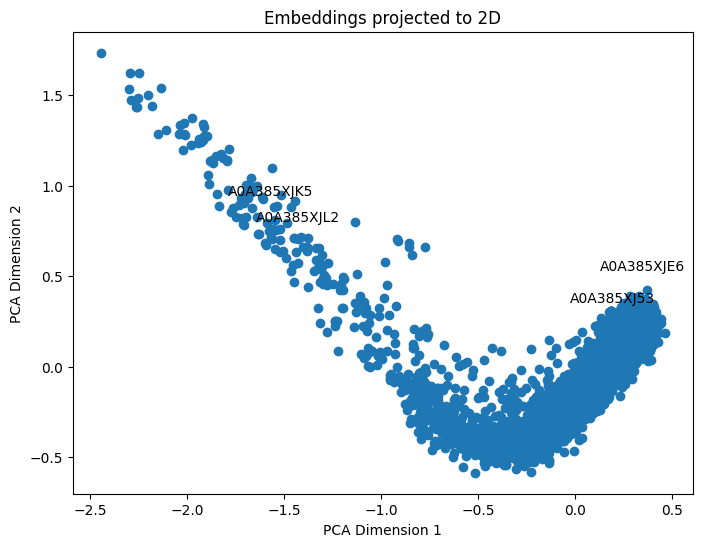

In [58]:
#Exercise 3
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings=np.array(list(prot_embeddings.values()))
pca=PCA(n_components=2)
pca_result=pca.fit_transform(embeddings)



plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("Embeddings projected to 2D")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
count=0
for i, protein_id in enumerate(prot_embeddings.keys()):
    if count>3:
      break
    plt.annotate(protein_id, (pca_result[i, 0], pca_result[i, 1]),
               textcoords="offset points",xytext=(0, 30),
               ha='center')
    count+=1

plt.show()

In [93]:
#Exercise 4
import plotly.express as px

namedf = pd.read_csv('proteome.tsv', sep='\t')
namedict=namedf.set_index('Entry')['Entry Name'].to_dict()
print(namedict)


pca_df=pd.DataFrame(data=pca_result,columns=['PC1','PC2'])
pca_df['ref_id']=prot_embeddings.keys()

lst=[]
for protein_id in pca_df['ref_id']:
  lst.append(namedict[protein_id])
pca_df['protein_name']=lst
display(pca_df)

fig = px.scatter(pca_df, x='PC1', y='PC2', title='Embeddings projected to 2D',
  hover_name='protein_name', hover_data=['ref_id']
)

fig.show()

{'A5A616': 'MGTS_ECOLI', 'O32583': 'THIS_ECOLI', 'P00350': '6PGD_ECOLI', 'P00363': 'FRDA_ECOLI', 'P00370': 'DHE4_ECOLI', 'P00393': 'NDH_ECOLI', 'P00448': 'SODM_ECOLI', 'P00452': 'RIR1_ECOLI', 'P00490': 'PHSM_ECOLI', 'P00509': 'AAT_ECOLI', 'P00550': 'PTM3C_ECOLI', 'P00561': 'AK1H_ECOLI', 'P00562': 'AK2H_ECOLI', 'P00579': 'RPOD_ECOLI', 'P00582': 'DPO1_ECOLI', 'P00634': 'PPB_ECOLI', 'P00722': 'BGAL_ECOLI', 'P00803': 'LEP_ECOLI', 'P00804': 'LSPA_ECOLI', 'P00805': 'ASPG2_ECOLI', 'P00811': 'AMPC_ECOLI', 'P00861': 'DCDA_ECOLI', 'P00864': 'CAPP_ECOLI', 'P00888': 'AROF_ECOLI', 'P00893': 'ILVI_ECOLI', 'P00894': 'ILVH_ECOLI', 'P00903': 'PABA_ECOLI', 'P00904': 'TRPGD_ECOLI', 'P00914': 'PHR_ECOLI', 'P00926': 'SDHD_ECOLI', 'P00935': 'METB_ECOLI', 'P00936': 'CYAA_ECOLI', 'P00946': 'MANA_ECOLI', 'P00956': 'SYI_ECOLI', 'P00957': 'SYA_ECOLI', 'P00959': 'SYM_ECOLI', 'P00962': 'SYQ_ECOLI', 'P00963': 'ASNA_ECOLI', 'P00968': 'CARB_ECOLI', 'P02358': 'RS6_ECOLI', 'P02359': 'RS7_ECOLI', 'P02916': 'MALF_ECOLI',

,PC1,PC2,ref_id,protein_name
0,0.192167,0.127413,A0A385XJ53,INSA9_ECOLI
1,0.344169,0.303951,A0A385XJE6,INH21_ECOLI
2,-1.568206,0.716323,A0A385XJK5,YPAB_ECOLI
3,-1.431504,0.573899,A0A385XJL2,YGDT_ECOLI
4,0.182535,0.310136,A0A385XJL4,INSB9_ECOLI
...,...,...,...,...
4398,0.254031,0.021074,Q93K97,ADPP_ECOLI
4399,-0.894389,-0.095056,Q9XB42,YKFH_ECOLI
4400,-0.792177,0.199435,Q9Z3A0,YJGW_ECOLI
4401,-1.126571,0.515189,U3PVA8,IROK_ECOLI


In [96]:
#Exercise 5
metric = 'euclidean'
query_vec = np.array(query_embedding)
dist_lst = []

for i in range(len(df)):
    if query_id == df['ref_id'].iloc[i]:
        dist_lst.append(np.nan) # Use NaN for the same protein to avoid string/float mix
        continue

    embedding_vec = np.array(df['embedding'].iloc[i])
    distance = compute_distance(query_vec, embedding_vec, metric)
    dist_lst.append(distance)
df['euclidean distance']=dist_lst
res_df = df.dropna(subset=['euclidean distance']).copy()

minidx=res_df['euclidean distance'].idxmin()
maxidx=res_df['euclidean distance'].idxmax()
print(f'most similar protein is {res_df.loc[min_idx, "ref_id"]} with distance {res_df.loc[min_idx, "distance"]}')
print(f'least similar protein is {res_df.loc[maxidx, "ref_id"]} with distance {res_df.loc[maxidx, "distance"]}')


display(df)

most similar protein is P0CE49 with distance 0.0
least similar protein is P0AD72 with distance 0.9501953125


,ref_id,embedding,distance,protein_name,euclidean distance
1,A0A385XJE6,"[0.04794, 0.12286, 0.007145, 0.01444, 0.02454,...",NaN,YPAA_ECOLI,NaN
2,A0A385XJK5,"[0.0503, 0.0938, -0.04318, -0.04367, -0.029, -...",0.886719,YPAA_ECOLI,2.457031
3,A0A385XJL2,"[0.03955, 0.0903, -0.01991, 0.009315, -0.04788...",0.895508,YPAA_ECOLI,2.402344
4,A0A385XJL4,"[0.008354, 0.1595, 0.02472, 0.0475, 0.03152, 0...",0.218750,YPAA_ECOLI,1.034180
5,A5A605,"[-0.04333, -0.05872, 0.05298, -0.02203, 0.0005...",0.863281,YPAA_ECOLI,1.911133
...,...,...,...,...,...
4398,Q93K97,"[0.04385, 0.006367, -0.03177, 0.03647, 0.02083...",0.479980,YPAA_ECOLI,1.250977
4399,Q9XB42,"[-0.001819, 0.0888, -0.03842, 0.02385, -0.0679...",0.825684,YPAA_ECOLI,1.896484
4400,Q9Z3A0,"[0.00667, 0.1096, -0.06158, 0.02464, -0.006783...",0.847656,YPAA_ECOLI,2.011719
4401,U3PVA8,"[0.037, -0.01764, -0.02815, -0.01985, 0.02533,...",0.878906,YPAA_ECOLI,2.341797


Exercise 5
The nearest neighbor through euclidean and cosine distance are the same.

No, dimensionality reduction does not perfectly preserve distances. When projecting high-dimensional data down to 2D, some distortion is mathematically inevitable—it's impossible to faithfully represent all pairwise distances in a lower-dimensional space. Different methods make different trade-offs: PCA preserves global structure and maximizes variance explained but may distort local neighborhoods, while t-SNE and UMAP prioritize preserving local clusters at the expense of global distances, meaning that the space between clusters may not reflect true dissimilarity.


[LOGBOOK]
A tricky part was trying to creating the plots. I used ChatGPT to help me learn the syntax and how to use the plotting packages. Fetching the names was also confusing for me. I initially tried to do API requests but realized that my dataset was too big. I decided to download the tsv file and use ChatGPT to teach me how to parse it. Parsing a tsv file turned out easier than I thought. One thing that I learned about real world data is how to perform dimensional reduction and the disadvantages that come along with trying to reduce the dimensions to 2D.